In [25]:
import pandas as pd
import re
from collections import Counter
import os


# **1. Load Dataset**

In [26]:
df = pd.read_csv('/content/postings.csv')
df = df.dropna(subset=['job_skills'])  # keep only rows with skills
df['first_seen'] = pd.to_datetime(df['first_seen'], errors='coerce')
df.reset_index(drop=True, inplace=True)


/tmp/ipython-input-26-3684615894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_seen'] = pd.to_datetime(df['first_seen'], errors='coerce')


# **2. Clean and Standardize Skills**

In [27]:
# Basic cleaning - remove unwanted characters, limit length
def hard_clean_skills(text):
    skills = text.split(', ')
    cleaned = []
    for skill in skills:
        skill = re.sub(r'[^a-zA-Z0-9#+\-]', '', skill)  # keep only valid chars
        skill = skill.lower().strip()
        if 2 <= len(skill) <= 20 and not skill.startswith('#') and not any(char.isdigit() for char in skill):
            cleaned.append(skill)
    return ', '.join(cleaned)

df['cleaned_skills'] = df['job_skills'].apply(hard_clean_skills)

In [54]:
# Skill normalization map (grouping similar and inconsistent skill terms)
skill_map = {
    # SQL & ETL/ELT
    'structured query language': 'sql',
    'sql programming': 'sql',
    'etlpipelines': 'etl',
    'etl processes': 'etl',
    'elt processes': 'elt',

    # Data Warehousing
    'warehousing': 'datawarehouse',
    'data warehousing': 'datawarehouse',
    'data warehouse': 'datawarehouse',

    # BI Tools
    'power bi': 'powerbi',
    'Power BI': 'powerbi',
    'tableau software': 'tableau',

    # Data Engineering
    'data engineer': 'dataengineering',
    'de': 'dataengineering',

    # Pipelining
    'data pipelining': 'datapipeline',
    'data pipelines': 'datapipeline',

    # Spark
    'pyspark': 'spark',

    # Analytics
    'data analysis': 'dataanalytics',
    'dataanalysis': 'dataanalytics',
    'data analytics': 'dataanalytics',
    'data-analytics': 'dataanalytics',
    'data analyst': 'dataanalytics',

    # Visualization
    'data visualization': 'visualization',
    'visualization techniques': 'visualization',
    'datavisualization': 'visualization',

    # Dashboarding
    'dashboards': 'dashboard',
    'dashboarding': 'dashboard',

    # Modeling
    'datamodeling': 'datamodeling',
    'data modeling': 'datamodeling',

    # Maintenance & Cleaning
    'maintaining data': 'datamaintenance',
    'cleaning data': 'datacleaning',
    'data cleansing': 'datacleaning'
}


# **3. Get Top Skills Frequency**

In [57]:
# Flatten skills into a list and count
all_skills = ', '.join(df['final_skills']).split(', ')
skill_counts = Counter(all_skills)

# Get Top 50
top_skills = skill_counts.most_common(150)

# Convert to DataFrame and save
skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Frequency'])
os.makedirs("outputs", exist_ok=True)
skills_df.to_csv('outputs/skills_frequency.csv', index=False)



# **Data Visualization**


**BAR CHART** - *TOP 10 SKILLS*

/tmp/ipython-input-58-951183950.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Skill', x='Frequency', palette='mako')


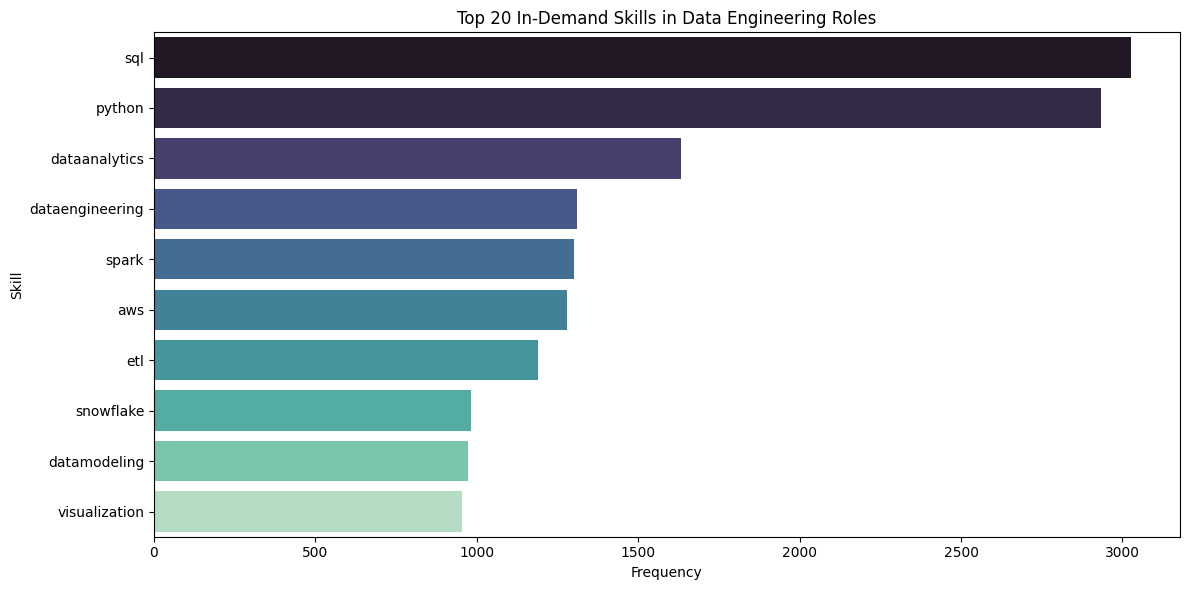

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort top 10
top_10 = skills_df.sort_values(by='Frequency', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, y='Skill', x='Frequency', palette='mako')
plt.title('Top 20 In-Demand Skills in Data Engineering Roles')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()


**WORD CLOUD**

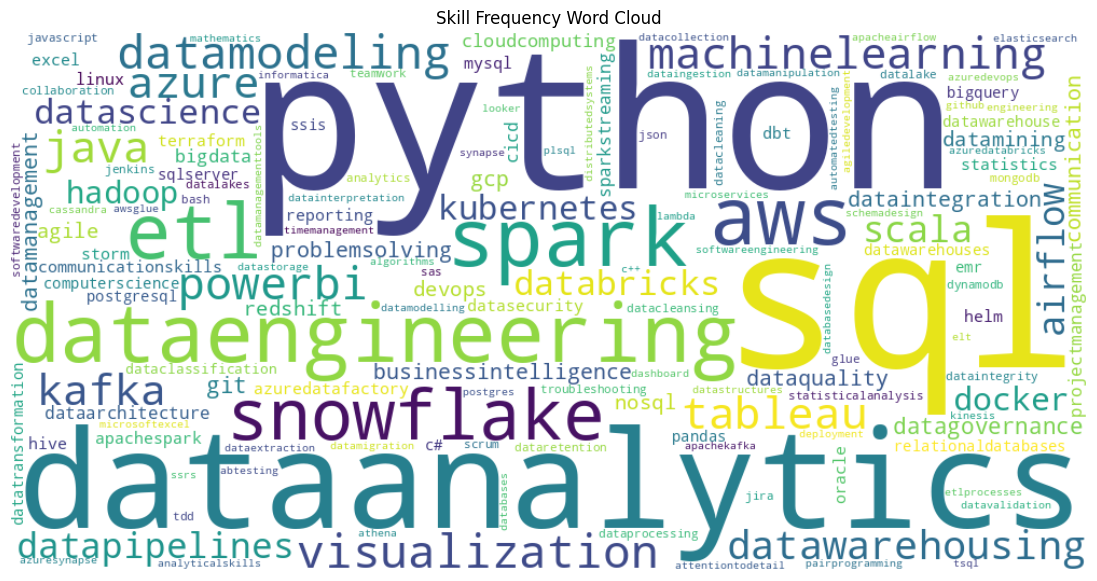

In [59]:
from wordcloud import WordCloud

# Create word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(
    dict(zip(skills_df['Skill'], skills_df['Frequency']))
)

# Display
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skill Frequency Word Cloud')
plt.show()


**PIE CHART** - *Top 10 Skills*



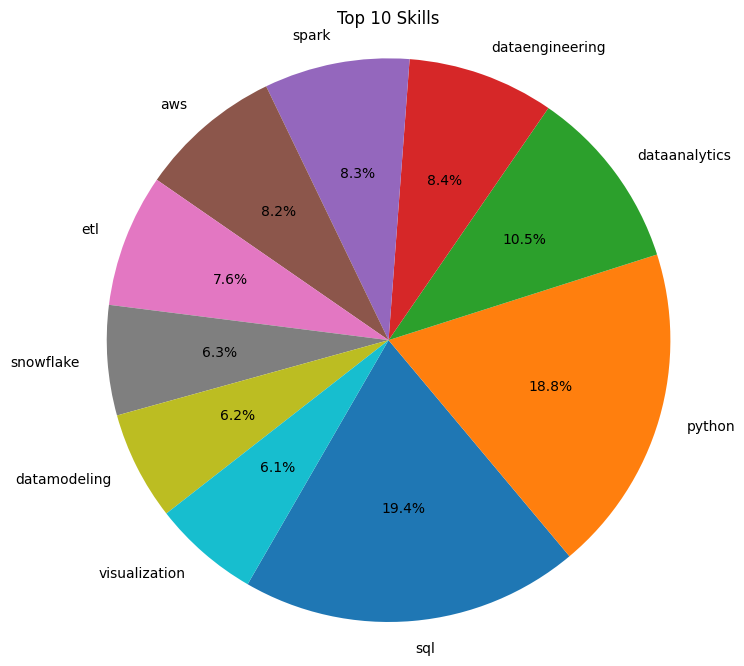

In [60]:
top_10 = skills_df.sort_values(by='Frequency', ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10['Frequency'], labels=top_10['Skill'], autopct='%2.1f%%', startangle=240)
plt.title('Top 10 Skills')
plt.axis('equal')
plt.show()
